In [1]:
import matplotlib.pyplot as plt
from matplotlib import patches
import matplotlib.colors as colors
import matplotlib.image as mpimg

import astropy.units as u
from astropy.visualization.mpl_normalize import ImageNormalize
from astropy.coordinates import SkyCoord

import sunpy.map
from sunpy.data.sample import AIA_171_IMAGE
from sunpy.map.maputils import all_coordinates_from_map

import pandas as pd
import numpy as np

# Turn off the search warnings.
import warnings
warnings.filterwarnings("ignore")

Files Downloaded:   0%|          | 0/26 [00:00<?, ?file/s]




AIA20110607_063302_0211_lowres.fits:   0%|          | 0.00/988k [00:00<?, ?B/s]


AIA20110607_063301_0131_lowres.fits:   0%|          | 0.00/962k [00:00<?, ?B/s]




AIA20110607_063302_0211_lowres.fits:   8%|▊         | 77.3k/988k [00:00<00:01, 713kB/s]

HMI20110607_063211_los_lowres.fits:   0%|          | 0.00/8.40M [00:00<?, ?B/s]

HMI20110607_063211_los_lowres.fits:   1%|▏         | 106k/8.40M [00:00<00:09, 897kB/s]

HMI20110607_063211_los_lowres.fits:  12%|█▏        | 1.03M/8.40M [00:00<00:01, 5.48MB/s]



AIA20110607_063302_0171_lowres.fits:   0%|          | 0.00/973k [00:00<?, ?B/s]

HMI20110607_063211_los_lowres.fits:  19%|█▉        | 1.62M/8.40M [00:00<00:01, 5.43MB/s]
aiacalibim5.fits.gz:   0%|          | 0.00/21.1M [00:00<?, ?B/s]

HMI20110607_063211_los_lowres.fits:  27%|██▋       | 2.27M/8.40M [00:00<00:01, 5.36MB/s]

HMI20110607_063211_los_lowres.fits:  41%|████      | 3.40M/8.40M [00:00<00:00, 7.32MB/s]



AIA

In [2]:
aia = sunpy.map.Map(AIA_171_IMAGE)

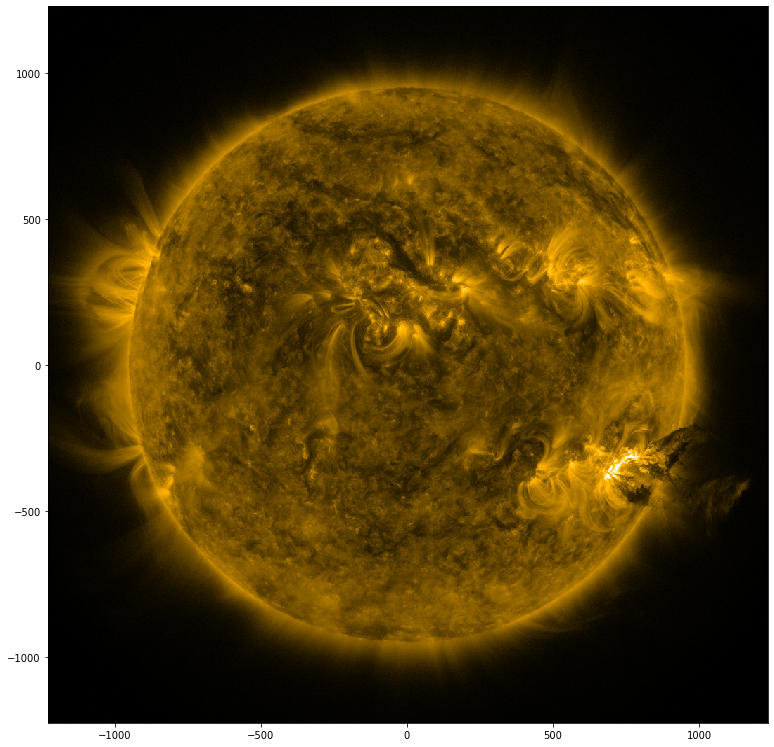

In [3]:
# Setup a frameless figure and an axes which spans the whole canvas.
figure = plt.figure(figsize=(10,10), frameon=False)
axes = plt.Axes(figure, [0., 0., 1., 1.])

# Disable the axis and add them to the figure.
#axes.set_axis_off()
figure.add_axes(axes, projection=map)

# Plot the map without any annotations
# This might raise a warning about the axes being wrong but we can ignore this
# as we are not plotting any axes.
im = aia.plot(axes=axes, annotate=False, clip_interval=(1, 99.99)*u.percent)

## **Using numpy to zoom in**

In [4]:
X = np.flip(aia.data,0)
print(np.shape(X))

(1024, 1024)


In [5]:
X_zoom = X[550:770,750:1020]

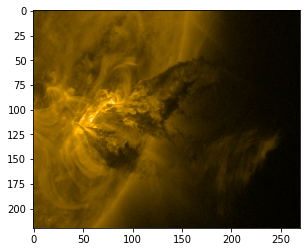

In [6]:
from sunpy.cm import cm
cmap = cm.cmlist.get('sdoaia171')
fig = plt.figure()
#plt.imshow(X_zoom , cmap=cmap)
plt.imshow(np.log(X_zoom + 100), cmap=cmap) #Using log function to get values closer together to map
plt.show()

## **Using sunpy to zoom in (code taken from the docs)**

In [ ]:
# Code taken from https://docs.sunpy.org/en/stable/guide/plotting.html

# Define a region of interest
length = 400 * u.arcsec
x0 = 750 * u.arcsec
y0 = -250 * u.arcsec

# Create a SunPy Map, and a second submap over the region of interest.
#smap = sunpy.map.Map(sunpy.data.sample.AIA_171_IMAGE)
bottom_left = SkyCoord(x0 - length, y0 - length,
                    frame=aia.coordinate_frame)
top_right = SkyCoord(x0 + length, y0 + (length-200 * u.arcsec),
                    frame=aia.coordinate_frame)
submap = aia.submap(bottom_left, top_right=top_right)

# Create a new matplotlib figure, larger than default.
fig = plt.figure(figsize=(5, 12))

# Add a first Axis, using the WCS from the map.
ax1 = fig.add_subplot(2, 1, 1, projection=aia)

# Plot the Map on the axes with default settings.
aia.plot()

# Draw a box on the image
aia.draw_rectangle(bottom_left, height=(length*2 -200 * u.arcsec), width=length * 2)

# Create a second axis on the plot.
ax2 = fig.add_subplot(2, 1, 2, projection=submap)

submap.plot()

# Change the title.
ax2.set_title('Zoomed View')

plt.show()